In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import random
random.seed(108448)
from scipy.stats import poisson

#%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

Data generation

In [55]:
# #Define the number of elements in each set I, J, K
# i_num = 30
# k_num = 2
# j_num = 200 #Without I and K, so real j_num_real = j_num + i_num + k_num
# degree_to_m = 111111

# #Define empty data frames
# I = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
# J = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
# K = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])



In [56]:
# #Define sets of I, J, K, where J contains I and K

# for i in range(i_num):
#     I.loc[i, 'Point number'] = 'i'+ str(i)
#     I.loc[i, 'Latitude'] = round(random.uniform(0, 5000), 0)
#     I.loc[i, 'Longitude'] = round(random.uniform(0, 5000), 0)

# I.index = I['Point number']
    
    
# for k in range(k_num):
#     K.loc[k, 'Point number'] = 'k'+ str(k)
#     K.loc[k, 'Latitude'] = round(random.uniform(0, 5000), 0)
#     K.loc[k, 'Longitude'] = round(random.uniform(0, 5000), 0)

# K.index = K['Point number']


# for j in range(j_num):
#     J.loc[j, 'Point number'] = 'j'+ str(j)
#     J.loc[j, 'Latitude'] = round(random.uniform(0, 5000), 0)
#     J.loc[j, 'Longitude'] = round(random.uniform(0, 5000), 0)

# J.index = J['Point number'] 
# J = pd.concat([J, K, I], axis = 0) #Include K to J
# J

In [57]:
### PASSAU  ###

#Define sets of I, J, K, where J contains I and K for Passau

#Define the number of elements in each set I, J, K

degree_to_m = 111111

#Define empty data frames
I_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
J_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])
K_coordinates = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longitude'])

column_types = {
    'Name': 'str',  # Example: 'int', 'float', 'str', 'datetime64[ns]', etc.
    'Latitude': 'float',
    'Longitude': 'float',
    'Address': 'str'
    # Add more columns and their data types as needed
}

doctors = pd.read_csv('Doctors coordinates.txt', sep = ';', index_col = False, dtype=column_types)

doctors

for i in range(len(doctors['Latitude'])):
    I_coordinates.loc[i, 'Point number'] = 'i'+ str(i)
    I_coordinates.loc[i, 'Latitude'] = doctors.loc[i, 'Latitude']
    I_coordinates.loc[i, 'Longitude'] = doctors.loc[i, 'Longitude']

I_coordinates.index = I_coordinates['Point number']

I = I_coordinates * degree_to_m
I['Point number'] = I_coordinates['Point number']


labs = pd.read_csv('Labs coordinates.txt', sep = ';', index_col = False, dtype=column_types) 
labs

for k in range(len(labs['Latitude'])):
    K_coordinates.loc[k, 'Point number'] = 'k'+ str(k)
    K_coordinates.loc[k, 'Latitude'] = labs.loc[k, 'Latitude']
    K_coordinates.loc[k, 'Longitude'] = labs.loc[k, 'Longitude']

K_coordinates.index = K_coordinates['Point number']

K = K_coordinates * degree_to_m
K['Point number'] = K_coordinates['Point number']


#Define range of coordinates

combined_coordinates = pd.concat([I_coordinates, K_coordinates])

min_latitude = combined_coordinates['Latitude'].min()
max_latitude = combined_coordinates['Latitude'].max()
min_longitude = combined_coordinates['Longitude'].min()
max_longitude = combined_coordinates['Longitude'].max()

grid_spacing = 0.0018

# Create grid points
grid_points = []
for lat in np.arange(min_latitude, max_latitude + grid_spacing, grid_spacing):
    for lon in np.arange(min_longitude, max_longitude + grid_spacing, grid_spacing):
        grid_points.append((round(lat, 6), round(lon, 6)))

J_coordinates = pd.DataFrame(grid_points, columns=['Latitude', 'Longitude'])
J_coordinates['Point number'] = ['j' + str(i) for i in range(len(J_coordinates))]

J_coordinates.index = J_coordinates['Point number'] 
J_coordinates = pd.concat([J_coordinates, K_coordinates, I_coordinates], axis = 0) #Include K to J

river = ['j972', 'j973', 'j918', 'j919', 'j920', 'j866', 'j867', 'j813', 'j814',
'j815', 'j760', 'j761', 'j762', 'j707', 'j708', 'j709', 'j710', 'j654',
'j655', 'j656', 'j657', 'j658', 'j606', 'j610', 'j611', 'j612', 'j613', 'j614',
'j615', 'j616', 'j620', 'j621', 'j622', 'j623', 'j624', 'j625', 'j682', 'j683',
'j684','j685','j686', 'j635', 'j636', 'j637', 'j638', 'j585', 'j586', 'j587', 
'j588', 'j589', 'j590', 'j591', 'j592','j593', 'j531', 'j530', 'j529', 'j528',
'j527', 'j22', 'j23', 'j77', 'j132', 'j133', 'j134', 'j189', 'j190', 'j244',
'j245', 'j300', 'j301', 'j356', 'j411', 'j412', 'j467', 'j523', 'j524', 'j525', 'j526',

'j246', 'j247', 'j191', 'j192', 'j193', 'j194', 'j135', 'j136', 'j137', 'j138', 'j139',
'j140', 'j141', 'j78', 'j79', 'j80', 'j81', 'j82', 'j83', 'j84', 'j85', 'j86', 'j87', 'j88',
'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36',
 'j261', 'j262', 'j263', 'j264', 'j266', 'j267', 'j268', 'j269', 'j206', 'j207', 'j208',
'j209', 'j210', 'j211', 'j212', 'j213', 'j214', 'j215', 'j153', 'j154', 'j155', 'j156',
'j157', 'j158', 'j159', 'j160', 'j161', 'j98', 'j99', 'j100', 'j101', 'j102', 'j103', 
'j104', 'j105', 'j106', 'j107', 'j43', 'j44', 'j45', 'j46', 'j47', 'j48', 'j49', 'j50', 
'j51', 'j52', 'j53'
 ]

J_coordinates = J_coordinates.drop(index = river) #excluding locations on the river

J = J_coordinates * degree_to_m
J['Point number'] = J_coordinates['Point number']
J


Latitude       Longitude Point number
Point number                                             
j0            5395057.382715  1488454.289322           j0
j1            5395057.382715  1488654.289122           j1
j2            5395057.382715  1488854.288922           j2
j3            5395057.382715  1489054.288722           j3
j4            5395057.382715  1489254.288522           j4
...                      ...             ...          ...
i72           5396271.431962  1494016.582913          i72
i73           5396276.176425  1494035.132745          i73
i74           5397218.901411  1495210.024008          i74
i75           5397141.730722  1495460.689703          i75
i76           5397159.445319  1496899.447286          i76

[1048 rows x 3 columns]

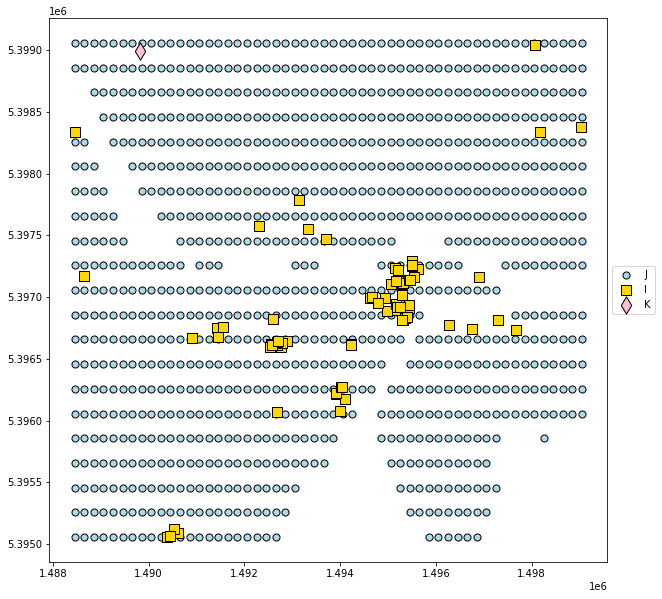

In [58]:
axs, fig = plt.subplots(1, 1, figsize = (10, 10))

fig.scatter(J['Longitude'], J['Latitude'], color = 'lightblue', edgecolors = 'black',
            marker = 'o', s = 50, label = 'J')
fig.scatter(I['Longitude'], I['Latitude'], color = 'gold', edgecolors = 'black',
            marker = 's', s = 100, label = 'I')
fig.scatter(K['Longitude'], K['Latitude'], color = 'pink', edgecolors = 'black',
            marker = 'd', s = 150, label = 'K')
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [59]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import shapely
#%pip install folium matplotlib mapclassify
import folium
import matplotlib



with open('Polygon Passau.txt', 'r') as file:
    # Read the contents of the file into a string
    polygon_str = file.read()

# Making Passau polygon

passau_map = folium.Map(location=[48.565, 13.433], zoom_start=12)

passau_poly = shapely.wkt.loads(polygon_str)
passau_gdf = gpd.GeoDataFrame(geometry=[passau_poly], crs="epsg:4326")
folium.GeoJson(passau_gdf).add_to(passau_map)


# Assuming I_coordinates is your DataFrame with doctor coordinates
geo_doctors = gpd.GeoDataFrame(I_coordinates, geometry=gpd.points_from_xy(I_coordinates["Latitude"], I_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_doctors.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(icon='circle', prefix='fa', color='orange', size = 0.1), 
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
    
geo_labs = gpd.GeoDataFrame(K_coordinates, geometry=gpd.points_from_xy(K_coordinates["Latitude"], K_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_labs.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.Marker([row['Latitude'], row['Longitude']], 
                  icon=folium.Icon(icon='circle', prefix='fa', color='red'), size = 0.1, 
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
    
geo_bases = gpd.GeoDataFrame(J_coordinates, geometry=gpd.points_from_xy(J_coordinates["Latitude"], J_coordinates["Longitude"]), crs="epsg:4326")

for idx, row in geo_bases.iterrows():
    coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
    folium.CircleMarker([row['Latitude'], row['Longitude']],  
                  popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)


#Custom legend

legend_html = '''
     <div style="position: fixed; 
                 bottom: 100px; right: 100px; width: 300px; height: 150px; 
                 border:2px solid grey; z-index:9999; font-size:16px;
                 background-color:white; opacity: 0.9;
                 ">
     &nbsp; <i class="fa fa-map-marker fa-3x" style="color:orange"></i> Doctors &nbsp; <br>
     &nbsp; <i class="fa fa-map-marker fa-3x" style="color:red"></i> Laboratories &nbsp; <br>
     &nbsp; <svg height="40" width="40">
          <circle cx="20" cy="20" r="18" fill="none" stroke="#3388FF" stroke-width="2" />
        </svg> Bases &nbsp; 
      </div>
     '''



# Add the legend to the map
passau_map.get_root().html.add_child(folium.Element(legend_html))

passau_map

In [60]:
#Define constants

B = 91800 #battery load: meters of travel
S = 5100 #meters of service time

p = 0.98

alpha = 15900 #euro

beta = {}
for j in J.index:
    if j.startswith('j'):
        beta[j] = 203000
    else:
        beta[j] = 76920
        
gamma = 0.0045 / 1000 # variable cost in euro per m
        
q_j = {}
for j in J.index:
    if j.startswith('j'):
        q_j[j] = 255
    else:
        q_j[j] = 45



softlimit = 3600
hardlimit = 10000


In [61]:
# up_bound = 10
# mu = {i : int(round(random.uniform(1, up_bound), 0)) for i in I.index}
mu = {'i0': 3,
 'i1': 9, 'i2': 4, 'i3': 6, 'i4': 5, 'i5': 10, 'i6': 5, 'i7': 9, 'i8': 2, 'i9': 8, 'i10': 7, 'i11': 9, 'i12': 5, 'i13': 5, 'i14': 6, 'i15': 5, 'i16': 6, 'i17': 3, 'i18': 2,
 'i19': 3, 'i20': 10, 'i21': 6, 'i22': 3, 'i23': 3, 'i24': 5, 'i25': 4, 'i26': 7, 'i27': 8, 'i28': 6, 'i29': 3, 'i30': 6, 'i31': 9, 'i32': 4, 'i33': 8, 'i34': 6, 'i35': 3,
 'i36': 1, 'i37': 2, 'i38': 2, 'i39': 6, 'i40': 9, 'i41': 8, 'i42': 3, 'i43': 3, 'i44': 9, 'i45': 3, 'i46': 9, 'i47': 2, 'i48': 8, 'i49': 8, 'i50': 10, 'i51': 10, 'i52': 9,
 'i53': 10, 'i54': 8, 'i55': 5, 'i56': 8, 'i57': 8, 'i58': 1, 'i59': 5, 'i60': 6, 'i61': 2, 'i62': 8, 'i63': 2, 'i64': 3, 'i65': 4, 'i66': 10, 'i67': 7, 'i68': 3, 'i69': 5,
 'i70': 5, 'i71': 2, 'i72': 8, 'i73': 2, 'i74': 2, 'i75': 9, 'i76': 9}

Deterministic model

In [62]:
# theta_det = {}
# for n in I.index:
#     theta_det[n] = list(poisson.rvs(mu[n], size = 1))[0]
# theta_det

theta_det = {'i0': 2, 'i1': 14, 'i2': 4, 'i3': 7, 'i4': 4, 'i5': 9, 'i6': 8, 'i7': 13, 'i8': 2, 'i9': 6, 'i10': 10, 'i11': 14, 'i12': 9, 'i13': 3, 'i14': 5, 'i15': 8, 'i16': 6,
 'i17': 1, 'i18': 1, 'i19': 2, 'i20': 6, 'i21': 5, 'i22': 3, 'i23': 3, 'i24': 4, 'i25': 8, 'i26': 12, 'i27': 8, 'i28': 5, 'i29': 3, 'i30': 4, 'i31': 6, 'i32': 3, 'i33': 9, 'i34': 7,
 'i35': 3, 'i36': 0, 'i37': 2, 'i38': 0, 'i39': 9, 'i40': 11, 'i41': 8, 'i42': 6, 'i43': 7, 'i44': 4, 'i45': 1, 'i46': 5, 'i47': 4, 'i48': 5, 'i49': 8, 'i50': 3, 'i51': 6, 'i52': 10,
 'i53': 14, 'i54': 5, 'i55': 12, 'i56': 7, 'i57': 10, 'i58': 1, 'i59': 9, 'i60': 2, 'i61': 1, 'i62': 10, 'i63': 3, 'i64': 3, 'i65': 3, 'i66': 7, 'i67': 10, 'i68': 3, 'i69': 5,
 'i70': 4, 'i71': 1, 'i72': 7, 'i73': 1, 'i74': 1, 'i75': 15, 'i76': 7}

In [63]:
#Define distance matrices

def distance(point1, PointsSet1, point2, PointsSet2):
    c1 = np.array((PointsSet1.loc[point1, 'Longitude'], PointsSet1.loc[point1, 'Latitude']))
    c2 = np.array((PointsSet2.loc[point2, 'Longitude'], PointsSet2.loc[point2, 'Latitude']))
    return np.linalg.norm(c1-c2)

dist_JI = {(c1, c2): distance(c1, J, c2, I)for c1, c2 in itertools.product(J.index, I.index)}
dist_IK = {(c1, c2): distance(c1, I, c2, K)for c1, c2 in itertools.product(I.index, K.index)}
dist_KJ = {(c1, c2): distance(c1, K, c2, J)for c1, c2 in itertools.product(K.index, J.index)}
 
dist_KJ


{('k0', 'j0'): 4161.767129977308,
 ('k0', 'j1'): 4100.403874253124,
 ('k0', 'j2'): 4048.0017366376105,
 ('k0', 'j3'): 4004.912486890546,
 ('k0', 'j4'): 3971.439264987311,
 ('k0', 'j5'): 3947.826678479448,
 ('k0', 'j6'): 3934.2522759915905,
 ('k0', 'j7'): 3930.820054260468,
 ('k0', 'j8'): 3937.556535061752,
 ('k0', 'j9'): 3954.409750473379,
 ('k0', 'j10'): 3981.2512257417548,
 ('k0', 'j11'): 4017.880785974353,
 ('k0', 'j12'): 4064.0337766969537,
 ('k0', 'j13'): 4119.390113349927,
 ('k0', 'j14'): 4183.584481493972,
 ('k0', 'j15'): 4256.2170012381475,
 ('k0', 'j16'): 4336.8637342508355,
 ('k0', 'j17'): 4425.086527661631,
 ('k0', 'j18'): 4520.441830742323,
 ('k0', 'j19'): 4622.488264231352,
 ('k0', 'j20'): 4730.792851181433,
 ('k0', 'j21'): 4844.9359220345705,
 ('k0', 'j37'): 7200.099425282223,
 ('k0', 'j38'): 7368.475561592201,
 ('k0', 'j39'): 7538.397197655254,
 ('k0', 'j40'): 7709.762146619819,
 ('k0', 'j41'): 7882.476276227165,
 ('k0', 'j42'): 8056.452815794278,
 ('k0', 'j54'): 3973.41

In [64]:
#Define set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= 0.5*B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [65]:
#Define set P
P = list()
for i, k in itertools.product(I.index, K.index):
    if dist_IK[(i, k)] <= 0.5*B:
        P.append((i, k))
        
P

[('i0', 'k0'),
 ('i1', 'k0'),
 ('i2', 'k0'),
 ('i3', 'k0'),
 ('i4', 'k0'),
 ('i5', 'k0'),
 ('i6', 'k0'),
 ('i7', 'k0'),
 ('i8', 'k0'),
 ('i9', 'k0'),
 ('i10', 'k0'),
 ('i11', 'k0'),
 ('i12', 'k0'),
 ('i13', 'k0'),
 ('i14', 'k0'),
 ('i15', 'k0'),
 ('i16', 'k0'),
 ('i17', 'k0'),
 ('i18', 'k0'),
 ('i19', 'k0'),
 ('i20', 'k0'),
 ('i21', 'k0'),
 ('i22', 'k0'),
 ('i23', 'k0'),
 ('i24', 'k0'),
 ('i25', 'k0'),
 ('i26', 'k0'),
 ('i27', 'k0'),
 ('i28', 'k0'),
 ('i29', 'k0'),
 ('i30', 'k0'),
 ('i31', 'k0'),
 ('i32', 'k0'),
 ('i33', 'k0'),
 ('i34', 'k0'),
 ('i35', 'k0'),
 ('i36', 'k0'),
 ('i37', 'k0'),
 ('i38', 'k0'),
 ('i39', 'k0'),
 ('i40', 'k0'),
 ('i41', 'k0'),
 ('i42', 'k0'),
 ('i43', 'k0'),
 ('i44', 'k0'),
 ('i45', 'k0'),
 ('i46', 'k0'),
 ('i47', 'k0'),
 ('i48', 'k0'),
 ('i49', 'k0'),
 ('i50', 'k0'),
 ('i51', 'k0'),
 ('i52', 'k0'),
 ('i53', 'k0'),
 ('i54', 'k0'),
 ('i55', 'k0'),
 ('i56', 'k0'),
 ('i57', 'k0'),
 ('i58', 'k0'),
 ('i59', 'k0'),
 ('i60', 'k0'),
 ('i61', 'k0'),
 ('i62', 'k0'),
 (

In [66]:
#Define sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_final = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_final.keys())
KJ_feas


[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [67]:
#Define sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_final = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_final.keys())
N_i

{'i0': [('k0', 'j37'),
  ('k0', 'j38'),
  ('k0', 'j39'),
  ('k0', 'j40'),
  ('k0', 'j41'),
  ('k0', 'j42'),
  ('k0', 'j89'),
  ('k0', 'j90'),
  ('k0', 'j91'),
  ('k0', 'j92'),
  ('k0', 'j93'),
  ('k0', 'j94'),
  ('k0', 'j95'),
  ('k0', 'j96'),
  ('k0', 'j97'),
  ('k0', 'j142'),
  ('k0', 'j143'),
  ('k0', 'j144'),
  ('k0', 'j145'),
  ('k0', 'j146'),
  ('k0', 'j147'),
  ('k0', 'j148'),
  ('k0', 'j149'),
  ('k0', 'j150'),
  ('k0', 'j151'),
  ('k0', 'j152'),
  ('k0', 'j195'),
  ('k0', 'j196'),
  ('k0', 'j197'),
  ('k0', 'j198'),
  ('k0', 'j199'),
  ('k0', 'j200'),
  ('k0', 'j201'),
  ('k0', 'j202'),
  ('k0', 'j203'),
  ('k0', 'j204'),
  ('k0', 'j205'),
  ('k0', 'j248'),
  ('k0', 'j249'),
  ('k0', 'j250'),
  ('k0', 'j251'),
  ('k0', 'j252'),
  ('k0', 'j253'),
  ('k0', 'j254'),
  ('k0', 'j255'),
  ('k0', 'j256'),
  ('k0', 'j257'),
  ('k0', 'j258'),
  ('k0', 'j259'),
  ('k0', 'j260'),
  ('k0', 'j265'),
  ('k0', 'j302'),
  ('k0', 'j303'),
  ('k0', 'j304'),
  ('k0', 'j305'),
  ('k0', 'j306'),
 

In [68]:
#Define sets O_j

O_j = {}
O_interim = []

for j in J.index:
    for (i, k) in P:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                O_interim.append((i, k))
    O_j[j] = O_interim
    O_interim = []
    
O_j_final = {key : val for key, val in O_j.items() if val != []}   
 
J_feas = list(O_j_final.keys())
J_feas

['j0',
 'j1',
 'j2',
 'j3',
 'j4',
 'j5',
 'j6',
 'j7',
 'j8',
 'j9',
 'j10',
 'j11',
 'j12',
 'j13',
 'j14',
 'j15',
 'j16',
 'j17',
 'j18',
 'j19',
 'j20',
 'j21',
 'j37',
 'j38',
 'j39',
 'j40',
 'j41',
 'j42',
 'j54',
 'j55',
 'j56',
 'j57',
 'j58',
 'j59',
 'j60',
 'j61',
 'j62',
 'j63',
 'j64',
 'j65',
 'j66',
 'j67',
 'j68',
 'j69',
 'j70',
 'j71',
 'j72',
 'j73',
 'j74',
 'j75',
 'j76',
 'j89',
 'j90',
 'j91',
 'j92',
 'j93',
 'j94',
 'j95',
 'j96',
 'j97',
 'j108',
 'j109',
 'j110',
 'j111',
 'j112',
 'j113',
 'j114',
 'j115',
 'j116',
 'j117',
 'j118',
 'j119',
 'j120',
 'j121',
 'j122',
 'j123',
 'j124',
 'j125',
 'j126',
 'j127',
 'j128',
 'j129',
 'j130',
 'j131',
 'j142',
 'j143',
 'j144',
 'j145',
 'j146',
 'j147',
 'j148',
 'j149',
 'j150',
 'j151',
 'j152',
 'j162',
 'j163',
 'j164',
 'j165',
 'j166',
 'j167',
 'j168',
 'j169',
 'j170',
 'j171',
 'j172',
 'j173',
 'j174',
 'j175',
 'j176',
 'j177',
 'j178',
 'j179',
 'j180',
 'j181',
 'j182',
 'j183',
 'j184',
 'j185',

In [69]:
model_det = gp.Model('Deterministic model without relaxation')

x_ikj = model_det.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [70]:
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) >= theta_det[i] for i in I_feas), name = 'c2')
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_det.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_det.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')

{('i0', 'k0', 'j0'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j1'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j2'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j3'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j4'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j5'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j6'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j7'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j8'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j9'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j10'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j11'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j12'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j13'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j14'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j15'): <gurobi.Constr *Awaiting Model Update*>,
 (

In [71]:
model_det.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)

def softtime(model, where):
    if where == GRB.Callback.MIP:
        runtime = model.cbGet(GRB.Callback.RUNTIME)
        objbst = model.cbGet(GRB.Callback.MIP_OBJBST)
        objbnd = model.cbGet(GRB.Callback.MIP_OBJBND)
        gap = abs((objbst - objbnd) / objbst)

        if runtime > softlimit and gap < 0.5:
            model.terminate()
            
model_det.setParam('TimeLimit', hardlimit)
model_det.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 162517 rows, 81744 columns and 291062 nonzeros
Model fingerprint: 0xe0f41352
Variable types: 0 continuous, 81744 integer (1048 binary)
Coefficient statistics:
  Matrix range     [8e-03, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 2.109293e+07
Presolve removed 161394 rows and 18042 columns
Presolve time: 1.42s
Presolved: 1123 rows, 63702 columns, 126356 nonzeros
Variable types: 0 continuous, 63702 integer (7451 binary)
Found heuristic solution: objective 2.007793e+07
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.17s

Solved with pri

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.callbackstub'
Traceback (most recent call last):
  File "src\gurobipy\callback.pxi", line 209, in gurobipy.CallbackClass.callback
  File "C:\Users\AleksandraPetrenko\AppData\Local\Temp\ipykernel_49132\3340277974.py", line 3, in softtime
KeyboardInterrupt: 


 22232  9989 7475498.05  130  115 7513321.50 7475497.58  0.50%   199 2865s
 22307 10009 7475498.09  136  281 7513321.50 7475497.58  0.50%   200 2873s


In [ ]:
def ListSolution(model):
        nSolutions = model.SolCount
        print('Number of solutions found: ' + str(nSolutions))
        for e in range(nSolutions):
        #for iter2 in range(1):
                model.setParam(GRB.Param.SolutionNumber, e)
                print(e)
                print('%g ' % model.PoolObjVal, end='\n')
                for v in model.getVars():
                        if v.X > 0:
                                print ('%s %g' % (v.varName, int(v.X)))
                                #print(v)
                print("\n")
                
        print("\n")
        
ListSolution(model_det)

Number of solutions found: 8
0
7.51332e+06 
x_ikj[i0,k0,j1035] 2
x_ikj[i1,k0,j1035] 14
x_ikj[i2,k0,j1035] 4
x_ikj[i3,k0,j1035] 7
x_ikj[i4,k0,j1035] 4
x_ikj[i5,k0,j1035] 9
x_ikj[i6,k0,j1035] 8
x_ikj[i7,k0,j1035] 13


x_ikj[i8,k0,j1035] 2
x_ikj[i9,k0,j1034] 6
x_ikj[i10,k0,j1034] 10
x_ikj[i11,k0,j1034] 14
x_ikj[i12,k0,j1035] 9
x_ikj[i13,k0,j1034] 3
x_ikj[i14,k0,j1034] 5
x_ikj[i15,k0,j1034] 8
x_ikj[i16,k0,j1034] 6
x_ikj[i17,k0,j1034] 1
x_ikj[i18,k0,j1034] 1
x_ikj[i19,k0,j1034] 2
x_ikj[i20,k0,j1034] 6
x_ikj[i21,k0,j1034] 5
x_ikj[i22,k0,j1035] 3
x_ikj[i23,k0,j1035] 3
x_ikj[i24,k0,j1034] 4
x_ikj[i25,k0,j1034] 8
x_ikj[i26,k0,j1035] 12
x_ikj[i27,k0,j1035] 8
x_ikj[i28,k0,j1035] 5
x_ikj[i29,k0,j1035] 3
x_ikj[i30,k0,j1035] 4
x_ikj[i31,k0,j1035] 6
x_ikj[i32,k0,j1034] 3
x_ikj[i33,k0,j1034] 9
x_ikj[i34,k0,j1035] 7
x_ikj[i35,k0,j1035] 3
x_ikj[i37,k0,j1035] 2
x_ikj[i39,k0,j1035] 9
x_ikj[i40,k0,j1035] 11
x_ikj[i41,k0,j1035] 8
x_ikj[i42,k0,j1034] 6
x_ikj[i43,k0,j1035] 7
x_ikj[i44,k0,j1034] 4
x_ikj[i45,k0,j1034] 1
x_ikj[i46,k0,j1034] 5
x_ikj[i47,k0,j1034] 4
x_ikj[i48,k0,j1034] 5
x_ikj[i49,k0,j1034] 8
x_ikj[i50,k0,j1034] 3
x_ikj[i51,k0,j1034] 6
x_ikj[i52,k0,j1034] 10
x_ikj[i53,k0,j1034] 14
x_ikj[i54,k0,j1034] 5
x_ikj

In [ ]:
def SolutionSummary(model):
    n = -1
    results = pd.DataFrame(columns = ['i', 'k', 'j', 'Number of drones'])
    for opt_sol in range(1):
        for v in model.getVars():
            if v.varName.startswith('x_ikj'):
                if v.X > 0:
                    n += 1
                    indices = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                    results.loc[n, 'i'] = indices[0]
                    results.loc[n, 'k'] = indices[1]
                    results.loc[n, 'j'] = indices[2]
                    results.loc[n, 'Number of drones'] = int(v.X)
    results_doctors = results.groupby('i', as_index = False)['Number of drones'].sum()
    results_locations = results.groupby('j', as_index = False)['Number of drones'].sum()
    results_labs = results.groupby('k', as_index = False)['Number of drones'].sum()
    total_drones = sum(results['Number of drones'])
    total_locations = results['j'].nunique()
    return results_doctors, results_locations, results_labs, f'Total number of drones: {total_drones}', f'Total number of locations: {total_locations}'

SolutionSummary(model_det)

(      i  Number of drones
 0    i0                 2
 1    i1                14
 2   i10                10
 3   i11                14
 4   i12                 9
 ..  ...               ...
 70  i74                 1
 71  i75                15
 72  i76                 7
 73   i8                 2
 74   i9                 6
 
 [75 rows x 2 columns],
        j  Number of drones
 0  j1034               202
 1  j1035               245,
     k  Number of drones
 0  k0               447,
 'Total number of drones: 447',
 'Total number of locations: 2')

In [ ]:
def SolutionGraph(I, K, J, model):
        
        axs, fig = plt.subplots(1, 1, figsize = (20, 20))
                
        fig.scatter(I['Longitude'], I['Latitude'], color = 'gold', edgecolors = 'black',
                                marker = 's', s = 300, label = 'I')
        for i in range (len(I.index)):
                fig.annotate(I.index[i], (I['Longitude'][i] - 40, I['Latitude'][i] - 15))
                
        fig.scatter(K['Longitude'], K['Latitude'], color = 'pink', edgecolors = 'black',
                                marker = 'd', s = 400, label = 'K')
        for k in range (len(K.index)):
                fig.annotate(K.index[k], (K['Longitude'][k] - 40, K['Latitude'][k] - 15))
        
        fig.set_title(model.ModelName)
        model.setParam(GRB.Param.SolutionNumber, 0)
        for v in model.getVars():
                if v.xn > 0:
                        if v.varName.startswith('x_ikj'):
                                indices_x = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                                fig.plot((J.loc[indices_x[2], 'Longitude'], I.loc[indices_x[0], 'Longitude']),
                                        (J.loc[indices_x[2], 'Latitude'], I.loc[indices_x[0], 'Latitude']),
                                        color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                                #fig.plot((I.loc[indices_x[0], 'Longitude'], K.loc[indices_x[1], 'Longitude']),
                                        #(I.loc[indices_x[0], 'Latitude'], K.loc[indices_x[1], 'Latitude']),
                                         #color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                                #fig.annotate(str(int(v.xn)), xy = ((K.loc[indices_x[1], 'Longitude'] + I.loc[indices_x[0], 'Longitude'])/2,
                                                                #(K.loc[indices_x[1], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2))
                                fig.annotate(str(int(v.xn)), xy = ((J.loc[indices_x[2], 'Longitude'] + I.loc[indices_x[0], 'Longitude'])/2,
                                                                (J.loc[indices_x[2], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2))
                        else:
                                index_y = v.varName[4:-1]
                                fig.scatter(J.loc[index_y, 'Longitude'], J.loc[index_y, 'Latitude'], color = 'green',
                                        edgecolors = 'black', s = 100, marker = 'X', label = index_y)
                fig.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    

#SolutionGraph(I, K, J, model_det)

In [ ]:
def SolutionMap(I_coordinates, K_coordinates, J_coordinates, model):
        
        with open('Polygon Passau.txt', 'r') as file:
        # Read the contents of the file into a string
                polygon_str = file.read()

        # Making Passau polygon
        passau_map = folium.Map(location=[48.565, 13.433], zoom_start=12)
        passau_poly = shapely.wkt.loads(polygon_str)
        passau_gdf = gpd.GeoDataFrame(geometry=[passau_poly], crs="epsg:4326")
        folium.GeoJson(passau_gdf).add_to(passau_map)

        # Assuming I_coordinates is your DataFrame with doctor coordinates
        geo_doctors = gpd.GeoDataFrame(I_coordinates, geometry=gpd.points_from_xy(I_coordinates["Latitude"], I_coordinates["Longitude"]), crs="epsg:4326") 
        
        indices_xi = []
        indices_y = pd.DataFrame(columns = ['Location name', 'Latitude', 'Longitude'])
        indices_x = pd.DataFrame(columns = ['I', 'J', 'Number of drones'])
        
        
        i = 0
        for v in model.getVars():
                if v.x > 0:
                        if v.varName.startswith('x_ikj'):
                                indices_xi = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                                indices_x.loc[i, 'I'] = str(indices_xi[0])
                                indices_x.loc[i, 'J'] = str(indices_xi[2])
                                indices_x.loc[i, 'Number of drones'] = int(v.x)
                                i += 1
                                
                        else:
                                y_name = v.varName[4:-1]
                                indices_y.loc[str(y_name), 'Latitude'] = J_coordinates.loc[str(y_name), 'Latitude']
                                indices_y.loc[str(y_name), 'Longitude'] = J_coordinates.loc[str(y_name), 'Longitude']
                                indices_y.loc[str(y_name), 'Location name'] = str(y_name)
                                # 
                                # fig.scatter(J.loc[index_y, 'Longitude'], J.loc[index_y, 'Latitude'], color = 'green',
                                #         edgecolors = 'black', s = 100, marker = 'X', label = index_y)
                        
        geo_solution_y = gpd.GeoDataFrame(indices_y, geometry=gpd.points_from_xy(indices_y["Latitude"], indices_y["Longitude"]), crs="epsg:4326")
        
        
        
        for idx, row in geo_doctors.iterrows():
                coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                        icon=folium.Icon(icon='circle', prefix='fa', color='orange', size = 0.1), 
                        popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
                
        
        
        geo_labs = gpd.GeoDataFrame(K_coordinates, geometry=gpd.points_from_xy(K_coordinates["Latitude"], K_coordinates["Longitude"]), crs="epsg:4326")

        for idx, row in geo_labs.iterrows():
                coordinates_label = f"Loc: {row['Point number']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                                icon=folium.Icon(icon='circle', prefix='fa', color='red'), size = 0.1, 
                                popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
        
       
        for idx, row in geo_solution_y.iterrows():
                coordinates_label = f"Loc: {row['Location name']}, Lat: {row['Latitude']}, Long: {row['Longitude']}"
                folium.Marker([row['Latitude'], row['Longitude']], 
                        icon=folium.Icon(icon='circle', prefix='fa', color='green', size = 0.1), 
                        popup=folium.Popup(coordinates_label, parse_html=True)).add_to(passau_map)
        
        
        for idx, row in indices_x.iterrows():
                point_i = I_coordinates.loc[row['I'], ['Latitude', 'Longitude']]
                point_j = J_coordinates.loc[row['J'], ['Latitude', 'Longitude']]
                folium.PolyLine(locations=[(point_i['Latitude'], point_i['Longitude']), 
                                        (point_j['Latitude'], point_j['Longitude'])], color='blue').add_to(passau_map)
                
                label = str(row['Number of drones'])
                div_icon_style = "background-color: white; border-radius: 50%; padding: 5px;"

                circle_size = 20
                folium.Marker([(point_i['Latitude'] + point_j['Latitude']) / 2, (point_i['Longitude'] + point_j['Longitude']) / 2], icon=folium.DivIcon(
                html=f"<div style='{div_icon_style}; width: {circle_size}px; height: {circle_size}px;'><div style='font-size: 10pt; color: blue;'>{label}</div></div>")).add_to(passau_map)
        
       
        return passau_map


SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_det)

Probabilistic model

In [ ]:
#Define constants and random variables

theta_ran_i = {}
for n in list(I.index):
    theta_ran_i[n] = poisson(mu[n])

l_i = {}
for i in theta_ran_i.keys():
    l_i[i] = int(theta_ran_i[i].ppf(p))


g_i = {}
for i in theta_ran_i.keys():
    g_i[i] = mu[i] * 7

IG = []
for i in I.index:
    for g in range(1, g_i[i] + 1):
        IG.append((i, g))

I_feasG = []
for i in I_feas:
    for g in range(1, g_i[i] + 1):
        I_feasG.append((i, g))
        

h_ig = {}
for (i, g) in I_feasG:
    h_ig[(i, g)] = math.log(theta_ran_i[i].cdf(l_i[i] + g)) - math.log(theta_ran_i[i].cdf(l_i[i] + g - 1))


phi = float(math.log(p) - sum(theta_ran_i[i].cdf(l_i[i]) for i in I_feas))
g_i

{'i0': 21,
 'i1': 63,
 'i2': 28,
 'i3': 42,
 'i4': 35,
 'i5': 70,
 'i6': 35,
 'i7': 63,
 'i8': 14,
 'i9': 56,
 'i10': 49,
 'i11': 63,
 'i12': 35,
 'i13': 35,
 'i14': 42,
 'i15': 35,
 'i16': 42,
 'i17': 21,
 'i18': 14,
 'i19': 21,
 'i20': 70,
 'i21': 42,
 'i22': 21,
 'i23': 21,
 'i24': 35,
 'i25': 28,
 'i26': 49,
 'i27': 56,
 'i28': 42,
 'i29': 21,
 'i30': 42,
 'i31': 63,
 'i32': 28,
 'i33': 56,
 'i34': 42,
 'i35': 21,
 'i36': 7,
 'i37': 14,
 'i38': 14,
 'i39': 42,
 'i40': 63,
 'i41': 56,
 'i42': 21,
 'i43': 21,
 'i44': 63,
 'i45': 21,
 'i46': 63,
 'i47': 14,
 'i48': 56,
 'i49': 56,
 'i50': 70,
 'i51': 70,
 'i52': 63,
 'i53': 70,
 'i54': 56,
 'i55': 35,
 'i56': 56,
 'i57': 56,
 'i58': 7,
 'i59': 35,
 'i60': 42,
 'i61': 14,
 'i62': 56,
 'i63': 14,
 'i64': 21,
 'i65': 28,
 'i66': 70,
 'i67': 49,
 'i68': 21,
 'i69': 35,
 'i70': 35,
 'i71': 14,
 'i72': 56,
 'i73': 14,
 'i74': 14,
 'i75': 63,
 'i76': 63}

In [ ]:
model_prob = gp.Model('Probabilistic model without relaxation')

x_ikj = model_prob.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [ ]:
#Probabilistic constraints

model_prob.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{('i0', 1): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 2): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 3): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 4): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 5): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 6): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 7): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 9): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 11): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 12): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 13): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 14): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 15): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 16): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 17): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 18): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 19): <gurobi.Constr *Awaiting

In [ ]:
#Same constraints as in the deterministic model

model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_prob.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_prob.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')

{('i0', 'k0', 'j0'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j1'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j2'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j3'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j4'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j5'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j6'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j7'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j8'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j9'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j10'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j11'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j12'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j13'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j14'): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 'k0', 'j15'): <gurobi.Constr *Awaiting Model Update*>,
 (

In [ ]:
model_prob.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)

In [ ]:
model_prob.setParam('TimeLimit', hardlimit)
model_prob.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 165500 rows, 84803 columns and 12803674 nonzeros
Model fingerprint: 0x9e56c06c
Variable types: 0 continuous, 84803 integer (4107 binary)
Coefficient statistics:
  Matrix range     [1e-13, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 8e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 3.219372e+07
Presolve removed 161393 rows and 3207 columns (presolve time = 9s) ...
Presolve removed 164375 rows and 3207 columns
Presolve time: 9.97s
Presolved: 1125 rows, 81596 columns, 162219 nonzeros
Variable types: 0 continuous, 81596 integer (1048 binary)
Fou

In [ ]:
ListSolution(model_prob)

Number of solutions found: 10
0
1.83128e+07 
x_ikj[i0,k0,k0] 10
x_ikj[i1,k0,j1035] 6
x_ikj[i1,k0,k0] 14
x_ikj[i2,k0,j1035] 11
x_ikj[i3,k0,j983] 15
x_ikj[i4,k0,j983] 13
x_ikj[i5,k0,j983] 21
x_ikj[i6,k0,j1034] 13
x_ikj[i7,k0,j983] 20
x_ikj[i8,k0,j983] 8
x_ikj[i9,k0,j1034] 3
x_ikj[i9,k0,i11] 15
x_ikj[i10,k0,j1034] 16
x_ikj[i11,k0,i11] 20
x_ikj[i12,k0,j983] 13
x_ikj[i13,k0,j1034] 13
x_ikj[i14,k0,j1033] 9
x_ikj[i14,k0,j1034] 6
x_ikj[i15,k0,j1034] 13
x_ikj[i16,k0,j1033] 15
x_ikj[i17,k0,j1033] 10
x_ikj[i18,k0,k0] 8
x_ikj[i19,k0,j1033] 10
x_ikj[i20,k0,j1033] 21
x_ikj[i21,k0,j1033] 15
x_ikj[i22,k0,j983] 10
x_ikj[i23,k0,j983] 10
x_ikj[i24,k0,j1033] 13
x_ikj[i25,k0,j1034] 11
x_ikj[i26,k0,j983] 16
x_ikj[i27,k0,j983] 18
x_ikj[i28,k0,j1035] 15
x_ikj[i29,k0,j1035] 10
x_ikj[i30,k0,j1035] 15
x_ikj[i31,k0,j1035] 20
x_ikj[i32,k0,j1033] 11
x_ikj[i33,k0,j1034] 18
x_ikj[i34,k0,j983] 15
x_ikj[i35,k0,j1035] 10
x_ikj[i36,k0,j1035] 5
x_ikj[i37,k0,j1035] 8
x_ikj[i38,k0,j1035] 8
x_ikj[i39,k0,j1035] 15
x_ikj[i40,k

In [ ]:
SolutionSummary(model_prob)

(      i  Number of drones
 0    i0                10
 1    i1                20
 2   i10                16
 3   i11                20
 4   i12                13
 ..  ...               ...
 72  i74                 8
 73  i75                20
 74  i76                20
 75   i8                 8
 76   i9                18
 
 [77 rows x 2 columns],
        j  Number of drones
 0    i11                45
 1  j1033               236
 2  j1034               255
 3  j1035               255
 4   j983               255
 5     k0                45,
     k  Number of drones
 0  k0              1091,
 'Total number of drones: 1091',
 'Total number of locations: 6')

In [ ]:
#SolutionGraph(I, K, J, model_prob)

In [ ]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_prob)

Probabilistic model with relaxed constraints

In [ ]:
#Redefine set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [ ]:
#Redefine set P
P = list()
for i, k in itertools.product(I.index, K.index):
    if dist_IK[(i, k)] <= B:
        P.append((i, k))
        
P

[('i0', 'k0'),
 ('i1', 'k0'),
 ('i2', 'k0'),
 ('i3', 'k0'),
 ('i4', 'k0'),
 ('i5', 'k0'),
 ('i6', 'k0'),
 ('i7', 'k0'),
 ('i8', 'k0'),
 ('i9', 'k0'),
 ('i10', 'k0'),
 ('i11', 'k0'),
 ('i12', 'k0'),
 ('i13', 'k0'),
 ('i14', 'k0'),
 ('i15', 'k0'),
 ('i16', 'k0'),
 ('i17', 'k0'),
 ('i18', 'k0'),
 ('i19', 'k0'),
 ('i20', 'k0'),
 ('i21', 'k0'),
 ('i22', 'k0'),
 ('i23', 'k0'),
 ('i24', 'k0'),
 ('i25', 'k0'),
 ('i26', 'k0'),
 ('i27', 'k0'),
 ('i28', 'k0'),
 ('i29', 'k0'),
 ('i30', 'k0'),
 ('i31', 'k0'),
 ('i32', 'k0'),
 ('i33', 'k0'),
 ('i34', 'k0'),
 ('i35', 'k0'),
 ('i36', 'k0'),
 ('i37', 'k0'),
 ('i38', 'k0'),
 ('i39', 'k0'),
 ('i40', 'k0'),
 ('i41', 'k0'),
 ('i42', 'k0'),
 ('i43', 'k0'),
 ('i44', 'k0'),
 ('i45', 'k0'),
 ('i46', 'k0'),
 ('i47', 'k0'),
 ('i48', 'k0'),
 ('i49', 'k0'),
 ('i50', 'k0'),
 ('i51', 'k0'),
 ('i52', 'k0'),
 ('i53', 'k0'),
 ('i54', 'k0'),
 ('i55', 'k0'),
 ('i56', 'k0'),
 ('i57', 'k0'),
 ('i58', 'k0'),
 ('i59', 'k0'),
 ('i60', 'k0'),
 ('i61', 'k0'),
 ('i62', 'k0'),
 (

In [ ]:
#Redefine sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_final = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_final.keys())
KJ_feas

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j3'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j40'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j57'),
 ('k0', 'j58'),
 ('k0', 'j59'),
 ('k0', 'j60'),
 ('k0', 'j61'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j64'),
 ('k0', 'j65'),
 ('k0', 'j66'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j89'),
 ('k0', 'j90'),
 ('k0', 'j91'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j108'),
 ('k0', 'j109'),
 ('k0', 'j110'),

In [ ]:
#Redefine sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_final = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_final.keys())

In [ ]:
#Redefine sets O_j

O_j = {}
O_interim = []

for j in J.index:
    for (i, k) in P:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] <= B:
                O_interim.append((i, k))
    O_j[j] = O_interim
    O_interim = []
    
O_j_final = {key : val for key, val in O_j.items() if val != []}   
 
J_feas = list(O_j_final.keys())
J_feas

['j0',
 'j1',
 'j2',
 'j3',
 'j4',
 'j5',
 'j6',
 'j7',
 'j8',
 'j9',
 'j10',
 'j11',
 'j12',
 'j13',
 'j14',
 'j15',
 'j16',
 'j17',
 'j18',
 'j19',
 'j20',
 'j21',
 'j37',
 'j38',
 'j39',
 'j40',
 'j41',
 'j42',
 'j54',
 'j55',
 'j56',
 'j57',
 'j58',
 'j59',
 'j60',
 'j61',
 'j62',
 'j63',
 'j64',
 'j65',
 'j66',
 'j67',
 'j68',
 'j69',
 'j70',
 'j71',
 'j72',
 'j73',
 'j74',
 'j75',
 'j76',
 'j89',
 'j90',
 'j91',
 'j92',
 'j93',
 'j94',
 'j95',
 'j96',
 'j97',
 'j108',
 'j109',
 'j110',
 'j111',
 'j112',
 'j113',
 'j114',
 'j115',
 'j116',
 'j117',
 'j118',
 'j119',
 'j120',
 'j121',
 'j122',
 'j123',
 'j124',
 'j125',
 'j126',
 'j127',
 'j128',
 'j129',
 'j130',
 'j131',
 'j142',
 'j143',
 'j144',
 'j145',
 'j146',
 'j147',
 'j148',
 'j149',
 'j150',
 'j151',
 'j152',
 'j162',
 'j163',
 'j164',
 'j165',
 'j166',
 'j167',
 'j168',
 'j169',
 'j170',
 'j171',
 'j172',
 'j173',
 'j174',
 'j175',
 'j176',
 'j177',
 'j178',
 'j179',
 'j180',
 'j181',
 'j182',
 'j183',
 'j184',
 'j185',

In [ ]:
model_prob_rel = gp.Model('Probabilistic model with relaxation')

x_ikj = model_prob_rel.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob_rel.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob_rel.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [ ]:

model_prob_rel.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

model_prob_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_prob_rel.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_prob_rel.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')
model_prob_rel.addConstrs((y_j[k] == 1 for k in K.index), name = 'c7')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{'k0': <gurobi.Constr *Awaiting Model Update*>}

In [ ]:
model_prob_rel.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)
model_prob_rel.setParam('TimeLimit', hardlimit)
model_prob_rel.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 165501 rows, 84803 columns and 12803675 nonzeros
Model fingerprint: 0x1588c0b6
Variable types: 0 continuous, 84803 integer (4107 binary)
Coefficient statistics:
  Matrix range     [1e-13, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 3.194156e+07
Presolve removed 161394 rows and 19444 columns (presolve time = 9s) ...
Presolve removed 164376 rows and 19444 columns (presolve time = 10s) ...
Presolve removed 164376 rows and 19444 columns
Presolve time: 11.34s
Presolved: 1125 rows, 65359 columns, 1

KeyboardInterrupt: 

Exception ignored in: 'gurobipy.callbackstub'
Traceback (most recent call last):
  File "src\gurobipy\callback.pxi", line 209, in gurobipy.CallbackClass.callback
  File "C:\Users\AleksandraPetrenko\AppData\Local\Temp\ipykernel_14508\3340277974.py", line 3, in softtime
KeyboardInterrupt: 


 22086 13453 1.8257e+07  835  278 1.8313e+07 1.8257e+07  0.31%  54.6  436s
 22087 13454 1.8257e+07   86  249 1.8313e+07 1.8257e+07  0.31%  54.6  440s
 22089 13455 1.8257e+07  976  285 1.8313e+07 1.8257e+07  0.31%  54.6  447s
 22091 13457 1.8257e+07   29  334 1.8313e+07 1.8257e+07  0.31%  54.6  452s
 22093 13458 1.8257e+07  831  415 1.8313e+07 1.8257e+07  0.31%  54.6  459s
 22094 13459 1.8257e+07  185  449 1.8313e+07 1.8257e+07  0.31%  54.6  460s
H22095 12785                    1.831279e+07 1.8257e+07  0.31%  54.6  466s
 22097 12787 1.8257e+07  561  531 1.8313e+07 1.8257e+07  0.31%  54.6  475s
 22100 12789 1.8257e+07  270  548 1.8313e+07 1.8257e+07  0.31%  54.6  481s
 22102 12790 1.8286e+07  452  471 1.8313e+07 1.8257e+07  0.31%  54.6  486s
 22104 12791 1.8257e+07  436  472 1.8313e+07 1.8257e+07  0.31%  54.6  490s
 22107 12793 1.8257e+07  725  500 1.8313e+07 1.8257e+07  0.31%  54.6  496s
 22109 12795 1.8257e+07  452  447 1.8313e+07 1.8257e+07  0.31%  54.6  501s
 22111 12796 1.8257e+07  

In [ ]:
ListSolution(model_prob_rel)

Number of solutions found: 10
0
1.83128e+07 
x_ikj[i0,k0,j1035] 10
x_ikj[i1,k0,j1035] 17
x_ikj[i1,k0,k0] 3
x_ikj[i2,k0,j984] 11
x_ikj[i3,k0,j984] 15
x_ikj[i4,k0,j984] 13
x_ikj[i5,k0,j1035] 21
x_ikj[i6,k0,j1035] 13
x_ikj[i7,k0,j1035] 20
x_ikj[i8,k0,j1035] 8
x_ikj[i9,k0,j1034] 18
x_ikj[i10,k0,j1034] 16
x_ikj[i11,k0,j1034] 20
x_ikj[i12,k0,j1035] 13
x_ikj[i13,k0,j1034] 13
x_ikj[i14,k0,j1033] 14
x_ikj[i14,k0,j1034] 1
x_ikj[i15,k0,j1034] 13
x_ikj[i16,k0,j1033] 14
x_ikj[i16,k0,j1034] 1
x_ikj[i17,k0,j1033] 10
x_ikj[i18,k0,k0] 8
x_ikj[i19,k0,j1033] 10
x_ikj[i20,k0,j1033] 21
x_ikj[i21,k0,j1033] 14
x_ikj[i21,k0,j1034] 1
x_ikj[i22,k0,j1035] 10
x_ikj[i23,k0,i23] 10
x_ikj[i24,k0,j1033] 12
x_ikj[i24,k0,j1034] 1
x_ikj[i25,k0,j1034] 11
x_ikj[i26,k0,j1035] 16
x_ikj[i27,k0,i23] 18
x_ikj[i28,k0,j984] 15
x_ikj[i29,k0,j984] 10
x_ikj[i30,k0,j984] 15
x_ikj[i31,k0,j984] 13
x_ikj[i31,k0,j1035] 7
x_ikj[i32,k0,j1033] 11
x_ikj[i33,k0,j1034] 18
x_ikj[i34,k0,j984] 15
x_ikj[i35,k0,j984] 10
x_ikj[i36,k0,j984] 5
x_ikj[

In [ ]:
SolutionSummary(model_prob_rel)

(      i  Number of drones
 0    i0                10
 1    i1                20
 2   i10                16
 3   i11                20
 4   i12                13
 ..  ...               ...
 72  i74                 8
 73  i75                20
 74  i76                20
 75   i8                 8
 76   i9                18
 
 [77 rows x 2 columns],
        j  Number of drones
 0    i23                44
 1  j1033               247
 2  j1034               255
 3  j1035               255
 4   j984               245
 5     k0                45,
     k  Number of drones
 0  k0              1091,
 'Total number of drones: 1091',
 'Total number of locations: 6')

In [ ]:
#SolutionGraph(I, K, J, model_prob_rel)

In [ ]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_prob_rel)

Deterministic model with relaxed constraints

In [ ]:
model_det_rel = gp.Model('Deterministic model with relaxation')

x_ikj = model_det_rel.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det_rel.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [ ]:
model_det_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i_final[i]) >= theta_det[i] for i in I_feas), name = 'c2')

model_det_rel.addConstrs((gp.quicksum(x_ikj[i, k, j] for (i, k) in O_j_final[j]) <= q_j[j] * y_j[j] for j in J_feas), name = 'c4')
model_det_rel.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)]) * x_ikj[i, k, j] <= B * x_ikj[i, k, j]
                  for i in I_feas for (k, j) in KJ_feas), name = 'c5')
model_det_rel.addConstrs((dist_JI[(j, i)] * x_ikj[i, k, j] <= S * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas), name = 'c6')
model_det_rel.addConstrs((y_j[k] == 1 for k in K.index), name = 'c7')

{'k0': <gurobi.Constr *Awaiting Model Update*>}

In [ ]:
model_det_rel.setObjective(gp.quicksum(alpha * x_ikj[i, k, j] + gamma * (dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * x_ikj[i, k, j] for i in I_feas for (k, j) in KJ_feas) + gp.quicksum(beta[j] * y_j[j] for j in J_feas), GRB.MINIMIZE)
model_det_rel.setParam('TimeLimit', hardlimit)
model_det_rel.optimize(softtime)

Set parameter TimeLimit to value 10000
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 162518 rows, 81744 columns and 323535 nonzeros
Model fingerprint: 0x16c02f55
Variable types: 0 continuous, 81744 integer (1048 binary)
Coefficient statistics:
  Matrix range     [8e-03, 9e+04]
  Objective range  [2e+04, 2e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 2.056085e+07
Presolve removed 161395 rows and 18043 columns
Presolve time: 0.51s
Presolved: 1123 rows, 63701 columns, 126355 nonzeros
Variable types: 0 continuous, 63701 integer (7450 binary)
Found heuristic solution: objective 1.987493e+07
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.05s

Solved with pri

In [ ]:
ListSolution(model_det_rel)

Number of solutions found: 8
0
7.59024e+06 
x_ikj[i0,k0,k0] 2
x_ikj[i1,k0,j1035] 14
x_ikj[i2,k0,j1035] 4
x_ikj[i3,k0,j1035] 7
x_ikj[i4,k0,j1035] 4
x_ikj[i5,k0,j1035] 9
x_ikj[i6,k0,j1035] 8
x_ikj[i7,k0,j1035] 13
x_ikj[i8,k0,j1035] 2
x_ikj[i9,k0,j1034] 6
x_ikj[i10,k0,j1034] 10
x_ikj[i11,k0,j1034] 14
x_ikj[i12,k0,j1035] 9
x_ikj[i13,k0,j1034] 3
x_ikj[i14,k0,j1034] 5
x_ikj[i15,k0,j1034] 8
x_ikj[i16,k0,j1034] 3
x_ikj[i16,k0,k0] 3
x_ikj[i17,k0,k0] 1
x_ikj[i18,k0,k0] 1
x_ikj[i19,k0,k0] 2
x_ikj[i20,k0,k0] 6
x_ikj[i21,k0,j1034] 5
x_ikj[i22,k0,j1035] 3
x_ikj[i23,k0,j1035] 3
x_ikj[i24,k0,j1034] 4
x_ikj[i25,k0,j1034] 8
x_ikj[i26,k0,j1035] 12
x_ikj[i27,k0,j1035] 8
x_ikj[i28,k0,j1035] 5
x_ikj[i29,k0,j1035] 3
x_ikj[i30,k0,j1035] 4
x_ikj[i31,k0,j1035] 6
x_ikj[i32,k0,k0] 3
x_ikj[i33,k0,j1034] 9
x_ikj[i34,k0,j1035] 7
x_ikj[i35,k0,j1035] 3
x_ikj[i37,k0,j1035] 2
x_ikj[i39,k0,j1035] 9
x_ikj[i40,k0,j1035] 11
x_ikj[i41,k0,j1035] 8
x_ikj[i42,k0,j1034] 6
x_ikj[i43,k0,j1035] 7
x_ikj[i44,k0,k0] 4
x_ikj[i45,k0,j10

In [ ]:
SolutionSummary(model_det_rel)

(      i  Number of drones
 0    i0                 2
 1    i1                14
 2   i10                10
 3   i11                14
 4   i12                 9
 ..  ...               ...
 70  i74                 1
 71  i75                15
 72  i76                 7
 73   i8                 2
 74   i9                 6
 
 [75 rows x 2 columns],
        j  Number of drones
 0  j1034               166
 1  j1035               236
 2     k0                45,
     k  Number of drones
 0  k0               447,
 'Total number of drones: 447',
 'Total number of locations: 3')

In [ ]:
SolutionMap(I_coordinates, K_coordinates, J_coordinates, model_det_rel)

In [ ]:
#SolutionGraph(I, K, J, model_prob_rel)

In [ ]:
#SolutionGraph(I, K, J, model_det_rel)

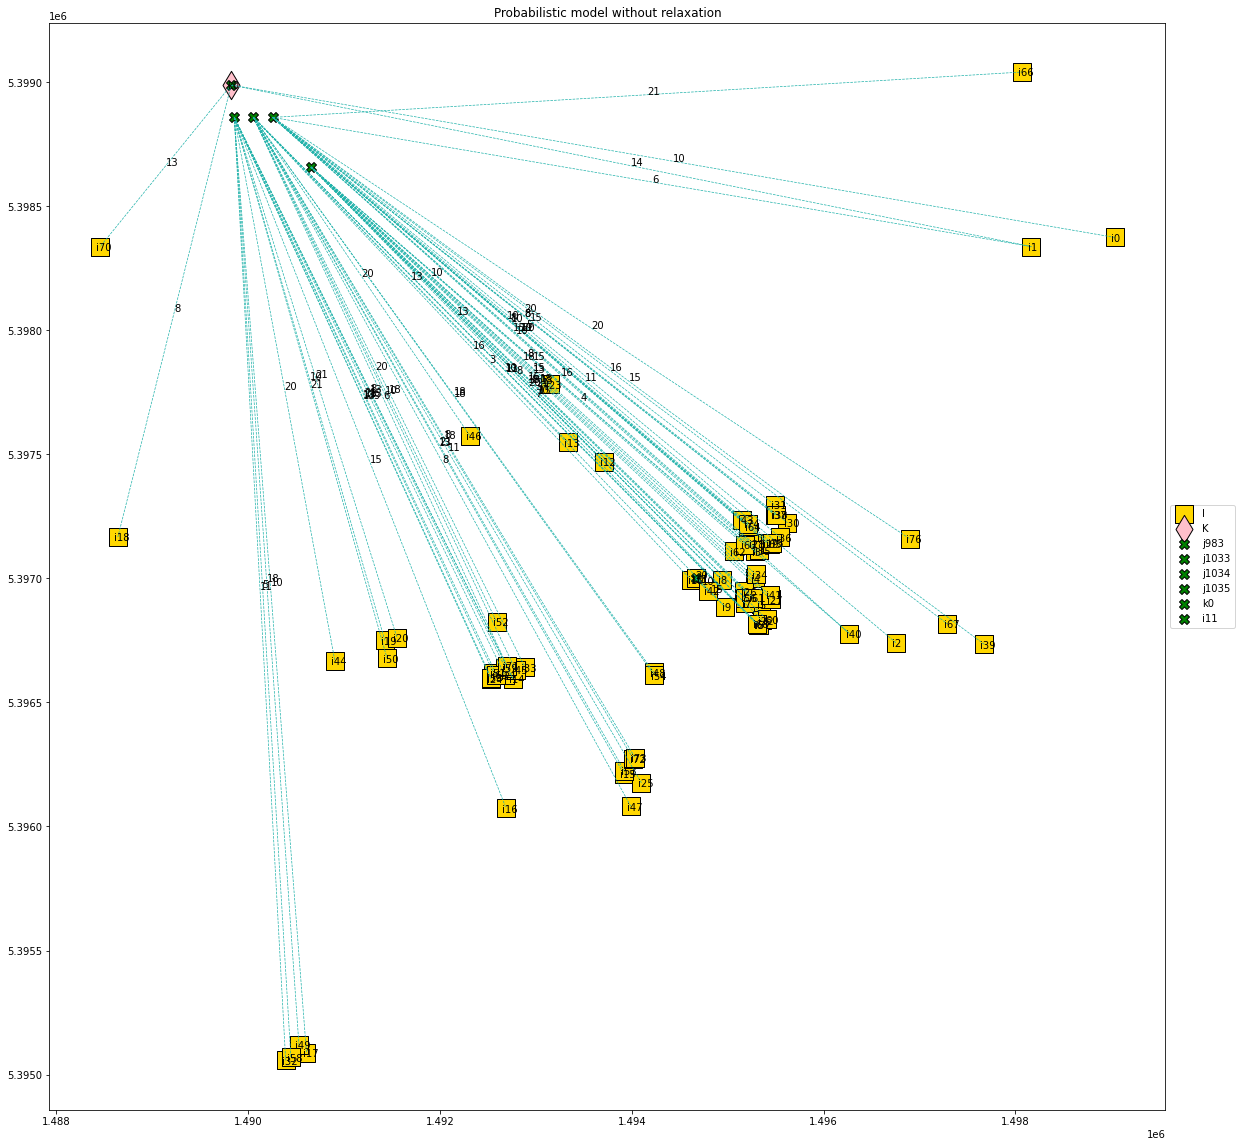

In [ ]:
SolutionGraph(I, K, J, model_prob)

In [ ]:
#SolutionGraph(I, K, J, model_det)

1) complete information optimum - lower bound for optimum
2) price of uncertainty

GRAPHS

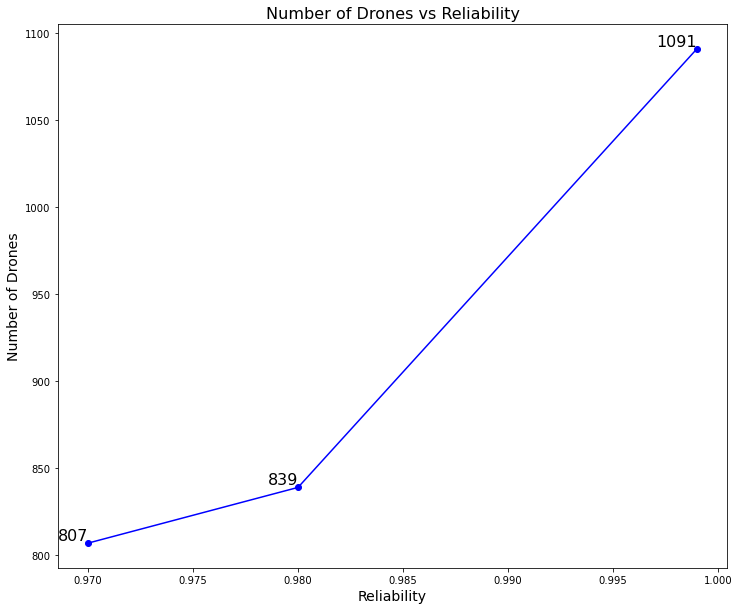

In [ ]:
import matplotlib.pyplot as plt

p = [0.97, 0.98, 0.999]
number_of_drones = [807, 839, 1091]

# Plot
plt.figure(figsize=(12, 10))
plt.plot(p, number_of_drones, marker='o', color='blue', linestyle='-')
plt.title('Number of Drones vs Reliability', fontsize = 16)
plt.xlabel('Reliability', fontsize = 14)
plt.ylabel('Number of Drones', fontsize = 14)

# Add labels to points
for i in range(len(p)):
    plt.text(p[i], number_of_drones[i], f'{number_of_drones[i]}', ha='right', va='bottom', fontsize = 16)

plt.show()

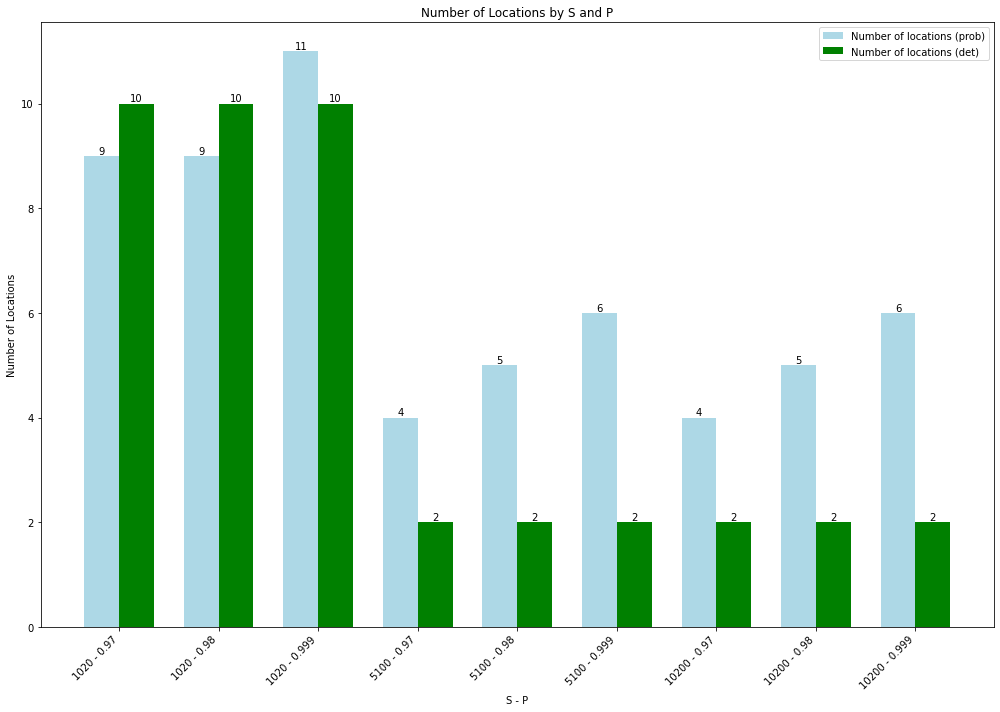

In [ ]:
import numpy as np

# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
locations_prob = [9, 9, 11, 4, 5, 6, 4, 5, 6]
locations_det = [10, 10, 10, 2, 2, 2, 2, 2, 2]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.35

# Plot
plt.figure(figsize=(14, 10))

# Plot Number of locations (prob)
bars_prob = plt.bar(x - bar_width/2, locations_prob, width=bar_width, color='lightblue', label='Number of locations (prob)')

# Plot Number of locations (det)
bars_det = plt.bar(x + bar_width/2, locations_det, width=bar_width, color='green', label='Number of locations (det)')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Number of Locations')
plt.title('Number of Locations by S and P')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_prob, bars_det]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

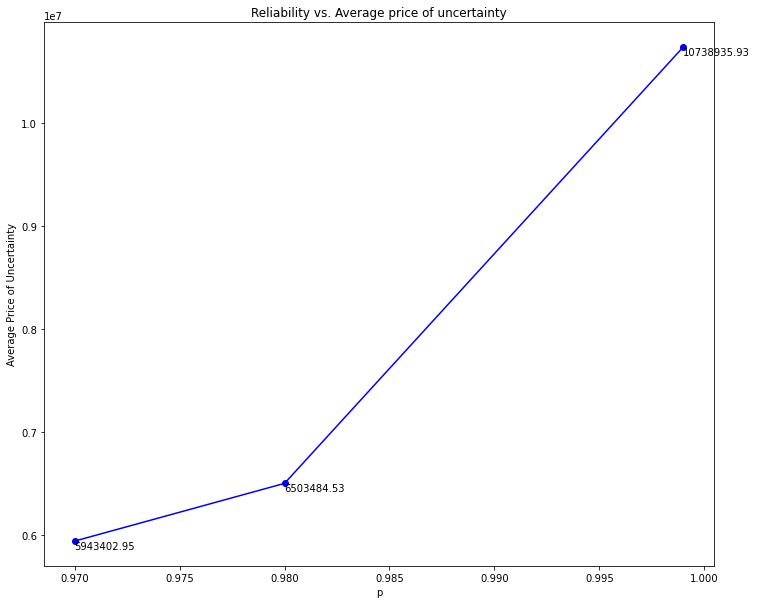

In [ ]:
p = [0.97, 0.98, 0.999]
average_price = [5943402.954, 6503484.525, 10738935.93]

# Plot
plt.figure(figsize=(12, 10))
plt.plot(p, average_price, marker='o', color='blue', linestyle='-')
plt.title('Reliability vs. Average price of uncertainty')
plt.xlabel('p')
plt.ylabel('Average Price of Uncertainty')

# Add labels to points
for i in range(len(p)):
    plt.text(p[i], average_price[i], f'{average_price[i]:.2f}', ha='left', va='top')

plt.show()

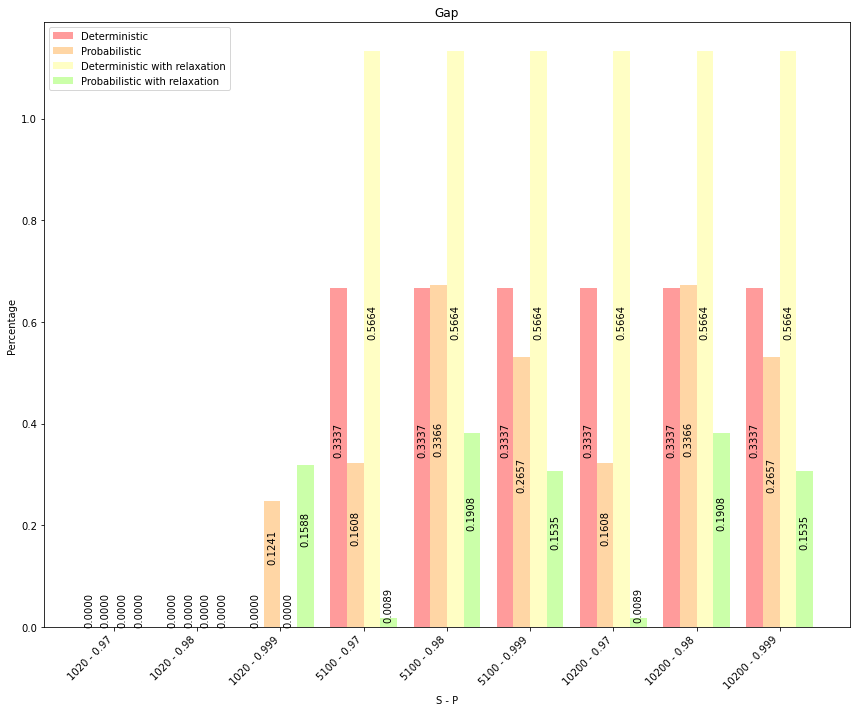

In [ ]:
# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
det = [0.0000, 0.0000, 0.0000, 0.6675, 0.6675, 0.6675, 0.6675, 0.6675, 0.6675]
prob = [0.0000, 0.0000, 0.2482, 0.3217, 0.6731, 0.5314, 0.3217, 0.6731, 0.5314]
det_relax = [0.0000, 0.0000, 0.0000, 1.1327, 1.1327, 1.1327, 1.1327, 1.1327, 1.1327]
prob_relax = [0.0000, 0.0000, 0.3177, 0.0177, 0.3817, 0.3070, 0.0177, 0.3817, 0.3070]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 10))

# Plot Deterministic
bars_det = plt.bar(x - 1.5 * bar_width, det, width=bar_width, color='#FF9B9B', label='Deterministic')

# Plot Probabilistic
bars_prob = plt.bar(x - 0.5 * bar_width, prob, width=bar_width, color='#FFD6A5', label='Probabilistic')

# Plot Deterministic with relaxation
bars_det_relax = plt.bar(x + 0.5 * bar_width, det_relax, width=bar_width, color='#FFFEC4', label='Deterministic with relaxation')

# Plot Probabilistic with relaxation
bars_prob_relax = plt.bar(x + 1.5 * bar_width, prob_relax, width=bar_width, color='#CBFFA9', label='Probabilistic with relaxation')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Percentage')
plt.title('Gap')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_det, bars_prob, bars_det_relax, bars_prob_relax]:
    for bar in bars:
        height = bar.get_height() / 2
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.4f}', ha='center', va='bottom', rotation = 90)

# Show plot
plt.tight_layout()
plt.show()

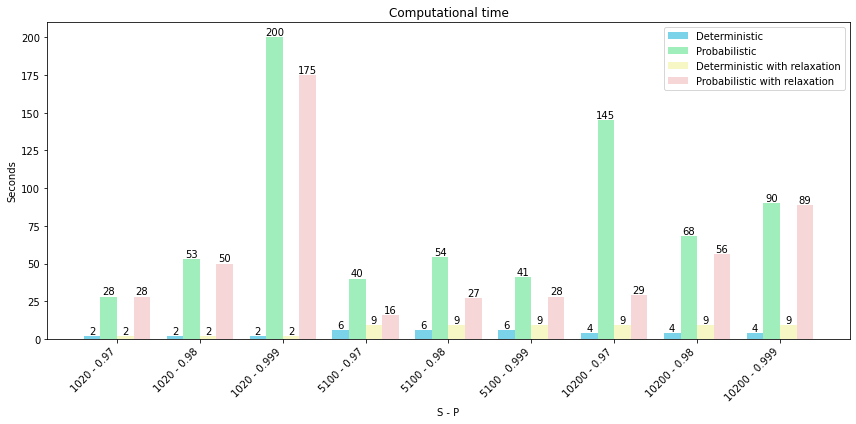

In [ ]:
# Data
S = [1020, 1020, 1020, 5100, 5100, 5100, 10200, 10200, 10200]
P = ['0.97', '0.98', '0.999'] * 3
det = [2, 2, 2, 6, 6, 6, 4, 4, 4]
prob = [28, 53, 200, 40, 54, 41, 145, 68, 90]
det_relax = [2, 2, 2, 9, 9, 9, 9, 9, 9]
prob_relax = [28, 50, 175, 16, 27, 28, 29, 56, 89]

# Create indices for x-axis
x = np.arange(len(S))

# Width of each bar
bar_width = 0.2

# Plot
plt.figure(figsize=(12, 6))

# Plot Deterministic
bars_det = plt.bar(x - 1.5 * bar_width, det, width=bar_width, color='#7BD3EA', label='Deterministic')

# Plot Probabilistic
bars_prob = plt.bar(x - 0.5 * bar_width, prob, width=bar_width, color='#A1EEBD', label='Probabilistic')

# Plot Deterministic with relaxation
bars_det_relax = plt.bar(x + 0.5 * bar_width, det_relax, width=bar_width, color='#F6F7C4', label='Deterministic with relaxation')

# Plot Probabilistic with relaxation
bars_prob_relax = plt.bar(x + 1.5 * bar_width, prob_relax, width=bar_width, color='#F6D6D6', label='Probabilistic with relaxation')

# Add labels and title
plt.xlabel('S - P')
plt.ylabel('Seconds')
plt.title('Computational time')
plt.xticks(x, [f'{S[i]} - {P[i]}' for i in range(len(S))], rotation=45, ha='right')
plt.legend()

# Add labels to the bars
for bars in [bars_det, bars_prob, bars_det_relax, bars_prob_relax]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()

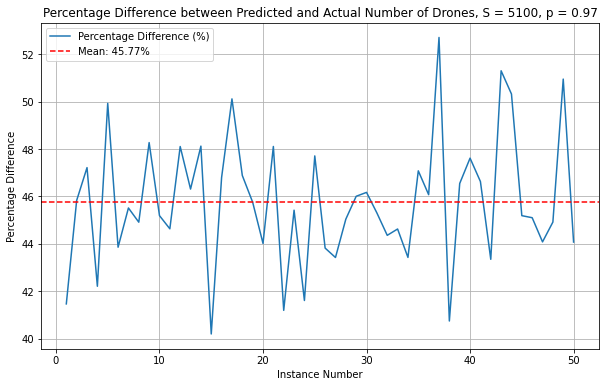

In [19]:
import matplotlib.pyplot as plt

# Provided data
model_numbers = [
    820, 816, 773, 770, 739, 700, 758, 757, 841, 759, 820, 767, 773, 694, 831, 
    735, 822, 787, 778, 727, 821, 857, 819, 834, 809, 801, 783, 817, 739, 797, 
    788, 780, 856, 753, 737, 790, 810, 837, 797, 777, 772, 789, 764, 763, 790, 
    776, 828, 797, 783, 810
]
actual_numbers = [
    480, 442, 408, 445, 370, 393, 413, 417, 435, 416, 454, 398, 415, 360, 497, 
    391, 410, 418, 422, 407, 426, 504, 447, 487, 423, 450, 443, 449, 399, 429, 
    431, 434, 474, 426, 390, 426, 383, 496, 426, 407, 412, 447, 372, 379, 433, 
    426, 463, 439, 384, 453
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.97')
plt.legend()
plt.grid(True)
plt.show()

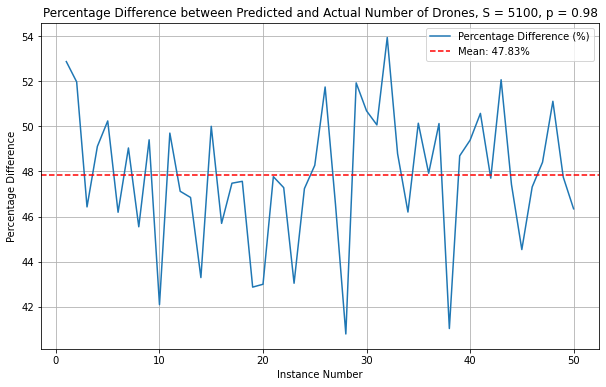

In [18]:
model_numbers = [
    872, 839, 812, 841, 842, 827, 781, 876, 836, 848, 829, 851, 777, 843, 846, 
    779, 813, 759, 807, 793, 829, 791, 755, 815, 810, 804, 825, 826, 832, 803, 
    821, 775, 781, 816, 732, 793, 818, 865, 879, 810, 787, 805, 824, 795, 824, 
    744, 816, 857, 779, 766
]

actual_numbers = [
    411, 403, 435, 428, 419, 445, 398, 477, 423, 491, 417, 450, 413, 478, 423, 
    423, 427, 398, 461, 452, 433, 417, 430, 430, 419, 388, 441, 489, 400, 396, 
    410, 357, 400, 439, 365, 413, 408, 510, 451, 410, 389, 421, 395, 418, 457, 
    392, 421, 419, 407, 411
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.98')
plt.legend()
plt.grid(True)
plt.show()

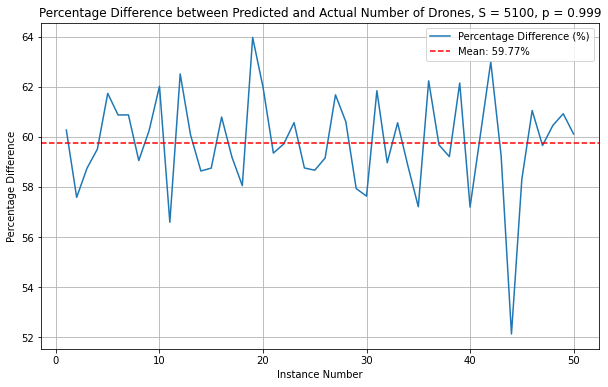

In [20]:
model_numbers = [
    1105, 1101, 1086, 1062, 1014, 1053, 1048, 1099, 1019, 1069, 1085, 1027, 1042, 
    1071, 1074, 1112, 1061, 1099, 1038, 1068, 1080, 1055, 1093, 1062, 1050, 1043, 
    1049, 1028, 1065, 1022, 1064, 987, 1070, 1013, 1096, 1091, 1116, 1064, 1070, 
    1084, 1090, 1062, 1146, 1128, 1060, 1063, 1103, 1004, 1062, 1048
]

actual_numbers = [
    439, 467, 448, 430, 388, 412, 410, 450, 405, 406, 471, 385, 416, 443, 443, 
    436, 433, 461, 374, 406, 439, 425, 431, 438, 434, 426, 402, 405, 448, 433, 
    406, 405, 422, 417, 469, 412, 450, 434, 405, 464, 435, 393, 467, 540, 442, 
    414, 445, 397, 415, 418
]

# Calculate percentage difference
percentage_difference = [((m - a) / m) * 100 for m, a in zip(model_numbers, actual_numbers)]

# Calculate mean percentage difference
mean_percentage_difference = sum(percentage_difference) / len(percentage_difference)

# Create the line graph for percentage difference
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(percentage_difference) + 1), percentage_difference, label='Percentage Difference (%)')
plt.axhline(y=mean_percentage_difference, color='r', linestyle='--', label=f'Mean: {mean_percentage_difference:.2f}%')
plt.xlabel('Instance Number')
plt.ylabel('Percentage Difference')
plt.title('Percentage Difference between Predicted and Actual Number of Drones, S = 5100, p = 0.999')
plt.legend()
plt.grid(True)
plt.show()